In [1]:
import importlib
import datamanip
importlib.reload(datamanip)

<module 'datamanip' (<_frozen_importlib_external.NamespaceLoader object at 0x107a42c90>)>

In [2]:
import torch
from filepath import *
from datamanip.plots import generate_matrix, generate_metrics
from models.GAT import GAT#, GCN, SimpleMPNN
from train_eval.train import train
from train_eval.evaluate import evaluate
from datamanip.datasetmanip.three_five_dataset import ThreeFiveDataset
from datamanip.datasetmanip.dataset_util import split_dataset

# Model Selection by number of 9's
### 1. Match 1-1: 0 vs. 7
### 2. Match 2-1: 0/1 vs. 2/3
### 3. Match 2-2: 4/5 vs. 6/7
### 4. Match 3-1: 0 vs. 1
### 5. Match 3-2: 2 vs. 3
### 6. Match 3-3: 4 vs. 5
### 7. Match 3-4: 6 vs. 7



In [3]:
match = "3-2"

In [4]:
if match == "1-1":
    NUM_EPOCHS = 150
    DROPOUT_RATE = 0.01
    LEARNING_RATE = 0.0005
    NODE_FEATURES = 10
    PATIENCE = 30
    HIDDEN_DIM = 64
elif match == "2-1":
    NUM_EPOCHS = 100
    DROPOUT_RATE = 0.3
    LEARNING_RATE = 0.0005
    NODE_FEATURES = 10
    PATIENCE = 15
    HIDDEN_DIM = 16
elif match == "2-2":
    NUM_EPOCHS = 150
    DROPOUT_RATE = 0.3
    LEARNING_RATE = 0.0005
    NODE_FEATURES = 10
    PATIENCE = 15
    HIDDEN_DIM = 28
elif match == "3-1":
    NUM_EPOCHS = 150
    DROPOUT_RATE = 0.3
    LEARNING_RATE = 0.0005
    NODE_FEATURES = 10
    PATIENCE = 15
    HIDDEN_DIM = 82

elif match == "3-2":
    NUM_EPOCHS = 200
    DROPOUT_RATE = 0.3
    LEARNING_RATE = 0.0001
    NODE_FEATURES = 10
    PATIENCE = 30
    HIDDEN_DIM = 128
elif match == "3-3":
    NUM_EPOCHS = 200
    DROPOUT_RATE = 0.3
    LEARNING_RATE = 0.0005
    NODE_FEATURES = 10
    PATIENCE = 30
    HIDDEN_DIM = 64
elif match == "3-4":
    NUM_EPOCHS = 200
    DROPOUT_RATE = 0.3
    LEARNING_RATE = 0.0005
    NODE_FEATURES = 10
    PATIENCE = 20
    HIDDEN_DIM = 32
else:
    NUM_EPOCHS = 100
    DROPOUT_RATE = 0.2
    LEARNING_RATE = 0.0007
    NODE_FEATURES = 10
    PATIENCE = 15
    HIDDEN_DIM = 64

In [5]:
#Create list of Data objects, each containing the node features, edge indices, and target values
data_list = ThreeFiveDataset(root=dataset_path, match=match)

In [6]:
train_loader, val_loader, test_loader = split_dataset(data_list)

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GAT(input_dim=NODE_FEATURES, hidden_dim=HIDDEN_DIM, output_dim=2, dropout_rate=DROPOUT_RATE).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = torch.nn.CrossEntropyLoss()

In [8]:
train_config = {
    "num_epochs": NUM_EPOCHS,
    "patience": PATIENCE,
    "device": device,
    "criterion": criterion,
    "optimizer": optimizer,
}

In [9]:
train(model, train_loader, val_loader, train_config, model_checkpoints_path + "/booster/" + match + ".pth")

Epoch 1/200, Train Loss: 0.6009
Epoch 1/200, Validation Loss: 0.5946
Best model updated based on validation loss.
Epoch 2/200, Train Loss: 0.5480
Epoch 2/200, Validation Loss: 0.5569
Best model updated based on validation loss.
Epoch 3/200, Train Loss: 0.5140
Epoch 3/200, Validation Loss: 0.4815
Best model updated based on validation loss.
Epoch 4/200, Train Loss: 0.5016
Epoch 4/200, Validation Loss: 0.4894
No improvement in validation loss for 1 epoch(s).
Epoch 5/200, Train Loss: 0.4948
Epoch 5/200, Validation Loss: 0.4690
Best model updated based on validation loss.
Epoch 6/200, Train Loss: 0.4864
Epoch 6/200, Validation Loss: 0.4567
Best model updated based on validation loss.
Epoch 7/200, Train Loss: 0.4844
Epoch 7/200, Validation Loss: 0.4585
No improvement in validation loss for 1 epoch(s).
Epoch 8/200, Train Loss: 0.4803
Epoch 8/200, Validation Loss: 0.6270
No improvement in validation loss for 2 epoch(s).
Epoch 9/200, Train Loss: 0.4754
Epoch 9/200, Validation Loss: 0.4828
No i

([0.6008562949847202,
  0.5480331417046437,
  0.5140289214598078,
  0.5016015982546774,
  0.49479288449701,
  0.4864212267050127,
  0.48441995957068035,
  0.4803346953018993,
  0.47544477911425287,
  0.47714753536140025,
  0.4689003493712873,
  0.4724037250795332,
  0.4667307401494104,
  0.46720050827783793,
  0.45809665096252145,
  0.4537135568605799,
  0.45432859606483356,
  0.44998934735246254,
  0.44436074299674455,
  0.43980160770164867,
  0.4387836659948031,
  0.436389524859636,
  0.4339868102045286,
  0.4271774517536974,
  0.4279398167670584,
  0.4215802162530876,
  0.4140019304543531,
  0.41307377680933394,
  0.416804173700258,
  0.41743117098500127,
  0.41109074648140237,
  0.4094439540387822,
  0.4061598718571825,
  0.40508430182021493,
  0.4043254139218606,
  0.4048911755790516,
  0.4030485005200315,
  0.396831979982707,
  0.4011652249260014,
  0.39944573632713887,
  0.39981848418104404,
  0.4031710129509978,
  0.3974880903199011,
  0.3939220415947794,
  0.3948665178551966,


In [10]:
# Load the best model after training
model.load_state_dict(torch.load(model_checkpoints_path + "/booster/" + match + ".pth", weights_only=True))

<All keys matched successfully>

In [11]:
true_values, predicted_values, accuracy = evaluate(device, model, test_loader, model_checkpoints_path + "/booster/" + match + ".pth")

GAT(
  (conv1): GATConv(10, 128, heads=1)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): GATConv(128, 64, heads=1)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=64, out_features=2, bias=True)
)
[np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0)]
[np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0)]
Accuracy: 0.8882


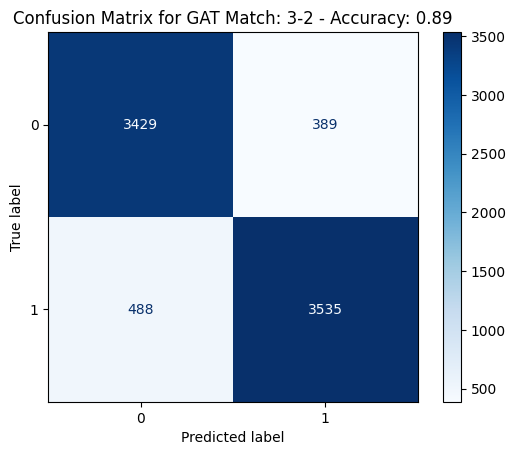

In [12]:
generate_matrix(true_values, predicted_values, accuracy, "GAT Match: "  + match)

In [13]:
generate_metrics(true_values, predicted_values, match, model_checkpoints_path, NUM_EPOCHS, LEARNING_RATE, NODE_FEATURES, DROPOUT_RATE, PATIENCE, HIDDEN_DIM)

Precision: 0.9009
Recall: 0.8787
F1 Score: 0.8896
AUROC: 0.8884
Accuracy: 0.8882
Metrics saved to /Users/jawayria/Desktop/EDISS/DIE/ADES-Reliability-Estimation/src/../models/booster/results/3-2.csv
